In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [17]:
data = pd.read_csv('diabetes.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [20]:
data.groupby('BMI').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
BMI,,,,,,,,
0.0,3.909091,104.272727,28.818182,4.181818,8.090909,0.433273,30.454545,0.181818
18.2,1.000000,92.333333,67.333333,11.333333,27.333333,0.356667,23.000000,0.000000
18.4,0.000000,104.000000,76.000000,0.000000,0.000000,0.582000,27.000000,0.000000
19.1,1.000000,80.000000,55.000000,0.000000,0.000000,0.258000,21.000000,0.000000
19.3,3.000000,99.000000,80.000000,11.000000,64.000000,0.284000,30.000000,0.000000
...,...,...,...,...,...,...,...,...
53.2,0.000000,162.000000,76.000000,56.000000,100.000000,0.759000,25.000000,1.000000
55.0,1.000000,88.000000,30.000000,42.000000,99.000000,0.496000,26.000000,1.000000
57.3,3.000000,123.000000,100.000000,35.000000,240.000000,0.880000,22.000000,0.000000


Text(0, 0.5, 'Outcome')

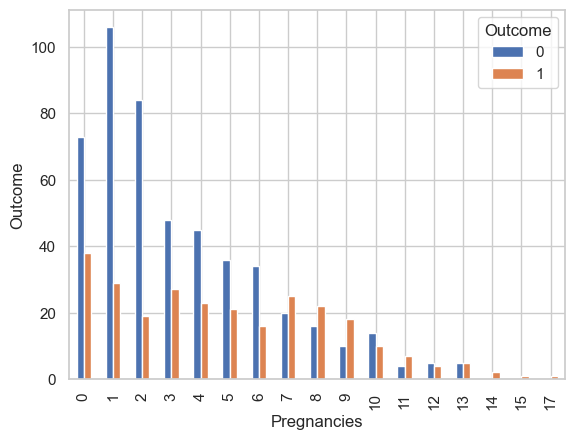

In [21]:
%matplotlib inline
pd.crosstab(data.Pregnancies,data.Outcome).plot(kind='bar')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')


In [22]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [23]:
X = data['Age'].values.reshape(-1, 1)  # Reshape Age column to a 2D array
y = data['Outcome']  # Assuming 'Outcome' is your target variable

# Now you can pass X and y to the fit method of your model
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [25]:
model.classes_

array([0, 1], dtype=int64)

In [26]:
model.intercept_
model.coef_

array([[0.03916524]])

In [29]:
model.predict_proba(X)

array([[0.49488326, 0.50511674],
       [0.67341509, 0.32658491],
       [0.66474381, 0.33525619],
       ...,
       [0.6819694 , 0.3180306 ],
       [0.524238  , 0.475762  ],
       [0.73826956, 0.26173044]])

In [33]:
model.predict(X)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [35]:
model.score(X, y)

0.6471354166666666

In [38]:
from sklearn.metrics import confusion_matrix

# Assuming you already have defined y and model.predict(X)
cm = confusion_matrix(y, model.predict(X))
print(cm)


[[454  46]
 [225  43]]


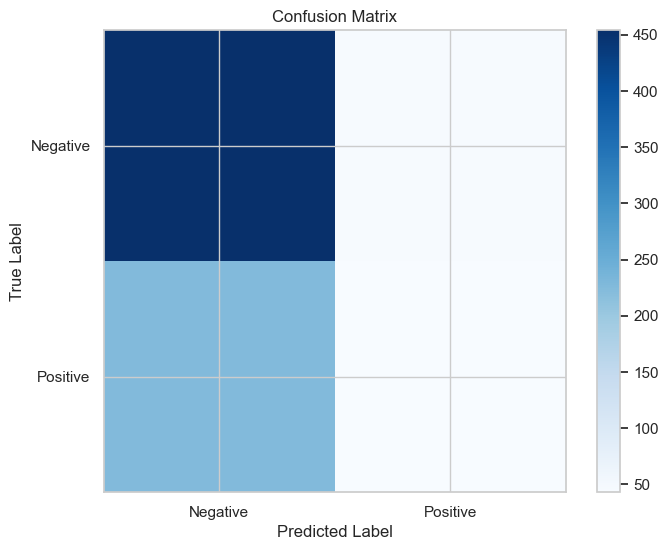

NameError: name 'plot_roc_curve' is not defined

In [42]:
from sklearn.metrics import RocCurveDisplay
y_true = data['Outcome']
y_pred = model.predict(X)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


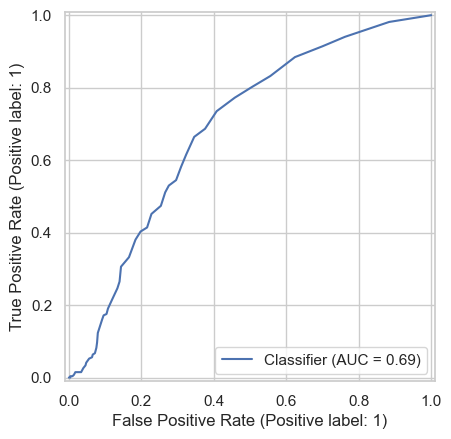

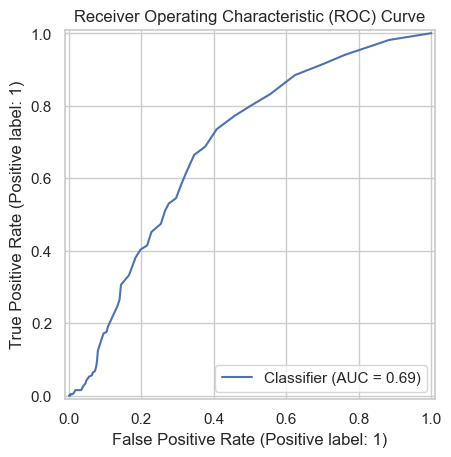

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have already defined y_true and model
y_pred = model.predict_proba(X)[:, 1]  # Probability estimates of the positive class
roc_display = RocCurveDisplay.from_predictions(y_true, y_pred)
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

